# Zero-Age Main Sequence

Figure 6.6 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of the Zero-Age Main Sequence (ZAMS) for solar metallicity stars with initial masses from 0.1 to 65 
M$_\odot$, showing masses with dots that will be repeated across subsequent plots, and wtih lines of constant 
R={0.1,1,10}R$_\odot$ plotting on a physical HR diagram.

Data are the MIST solar-metallicity evolution tracks (EEP) and isocrones (.iso) files.  They must be in the 
relative path of this notebook.

Also requires a pre-computed zero-age main sequence file, zams.dat, which can be extracted from the MIST 
database files using a different notebook if missing.

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Zero-Age Main Sequence Data

The ZAMS is based on model calculation from the MIST database v1.0 with [Fe/H]=0.0 ("solar") and 
v/v$_{crit}$=0.4.  The ZAMS data have been pre-extracted and are in the file zams.dat, this saves on the 
compute needed to page through the MIST data files (see the `Extract ZAMS.ipynb` supplemental notebook to
regenerate this file if needed.  Initial masses are from 0.1 to 300 M<sub>sun</sub>.

In [3]:
# Pre-extracted ZAMS data for the MIST model grid of interest

zamsFile = 'ZAMS/MIST_FeH0_ZAMS.txt'
zamsData = pd.read_csv(zamsFile,sep=r'\s+',comment='#')
zamsM = np.array(zamsData['Minit'])
zamsT = np.array(zamsData['Teff'])
zamsL = np.array(zamsData['Lsun'])

### Plot  Parameters

For this plot we use a range of selectable parameters:
 * Range of stellar masses in M$_\odot$ to show as dots along the ZAMS
 * Range of stellar radii to overplot as lines of constant R/R$_\odot$
 * Range of stellar effective temperature for the X axis
 * Range of stellar luminosity in L$_\odot$ for the Y axis

In addition, we give the T$_{eff}$ where we want the labels for the constant R/R$_\odot$ curves.

In [4]:
massList = [0.1,0.25,0.5,1.0,2.0,4.0,8.0,16.0,32.0,65.0]
radii = [0.1,1.0,10.0]
labelT = [10000.,50000.,10000.]

minT = 2000.0
maxT = 65000.0
minL = 1.0e-4
maxL = 1.0e7

Tsun = 5772. # IAU 2015 Resolution B3 Nominal Solar Teff [Prsa et al. 2016]

## Plot the figure

Plot the zero-age main sequence (ZAMS) as a solid lines for stars with solar metallicity. Dots are labeled 
with the stellar mass (in units of the nominal solar mass). The dashed lines show lines of constant stellar 
radius, at $R = 10 R_\odot$, $R = 1 R_\odot$, and $R = 0.1 R_\odot$.

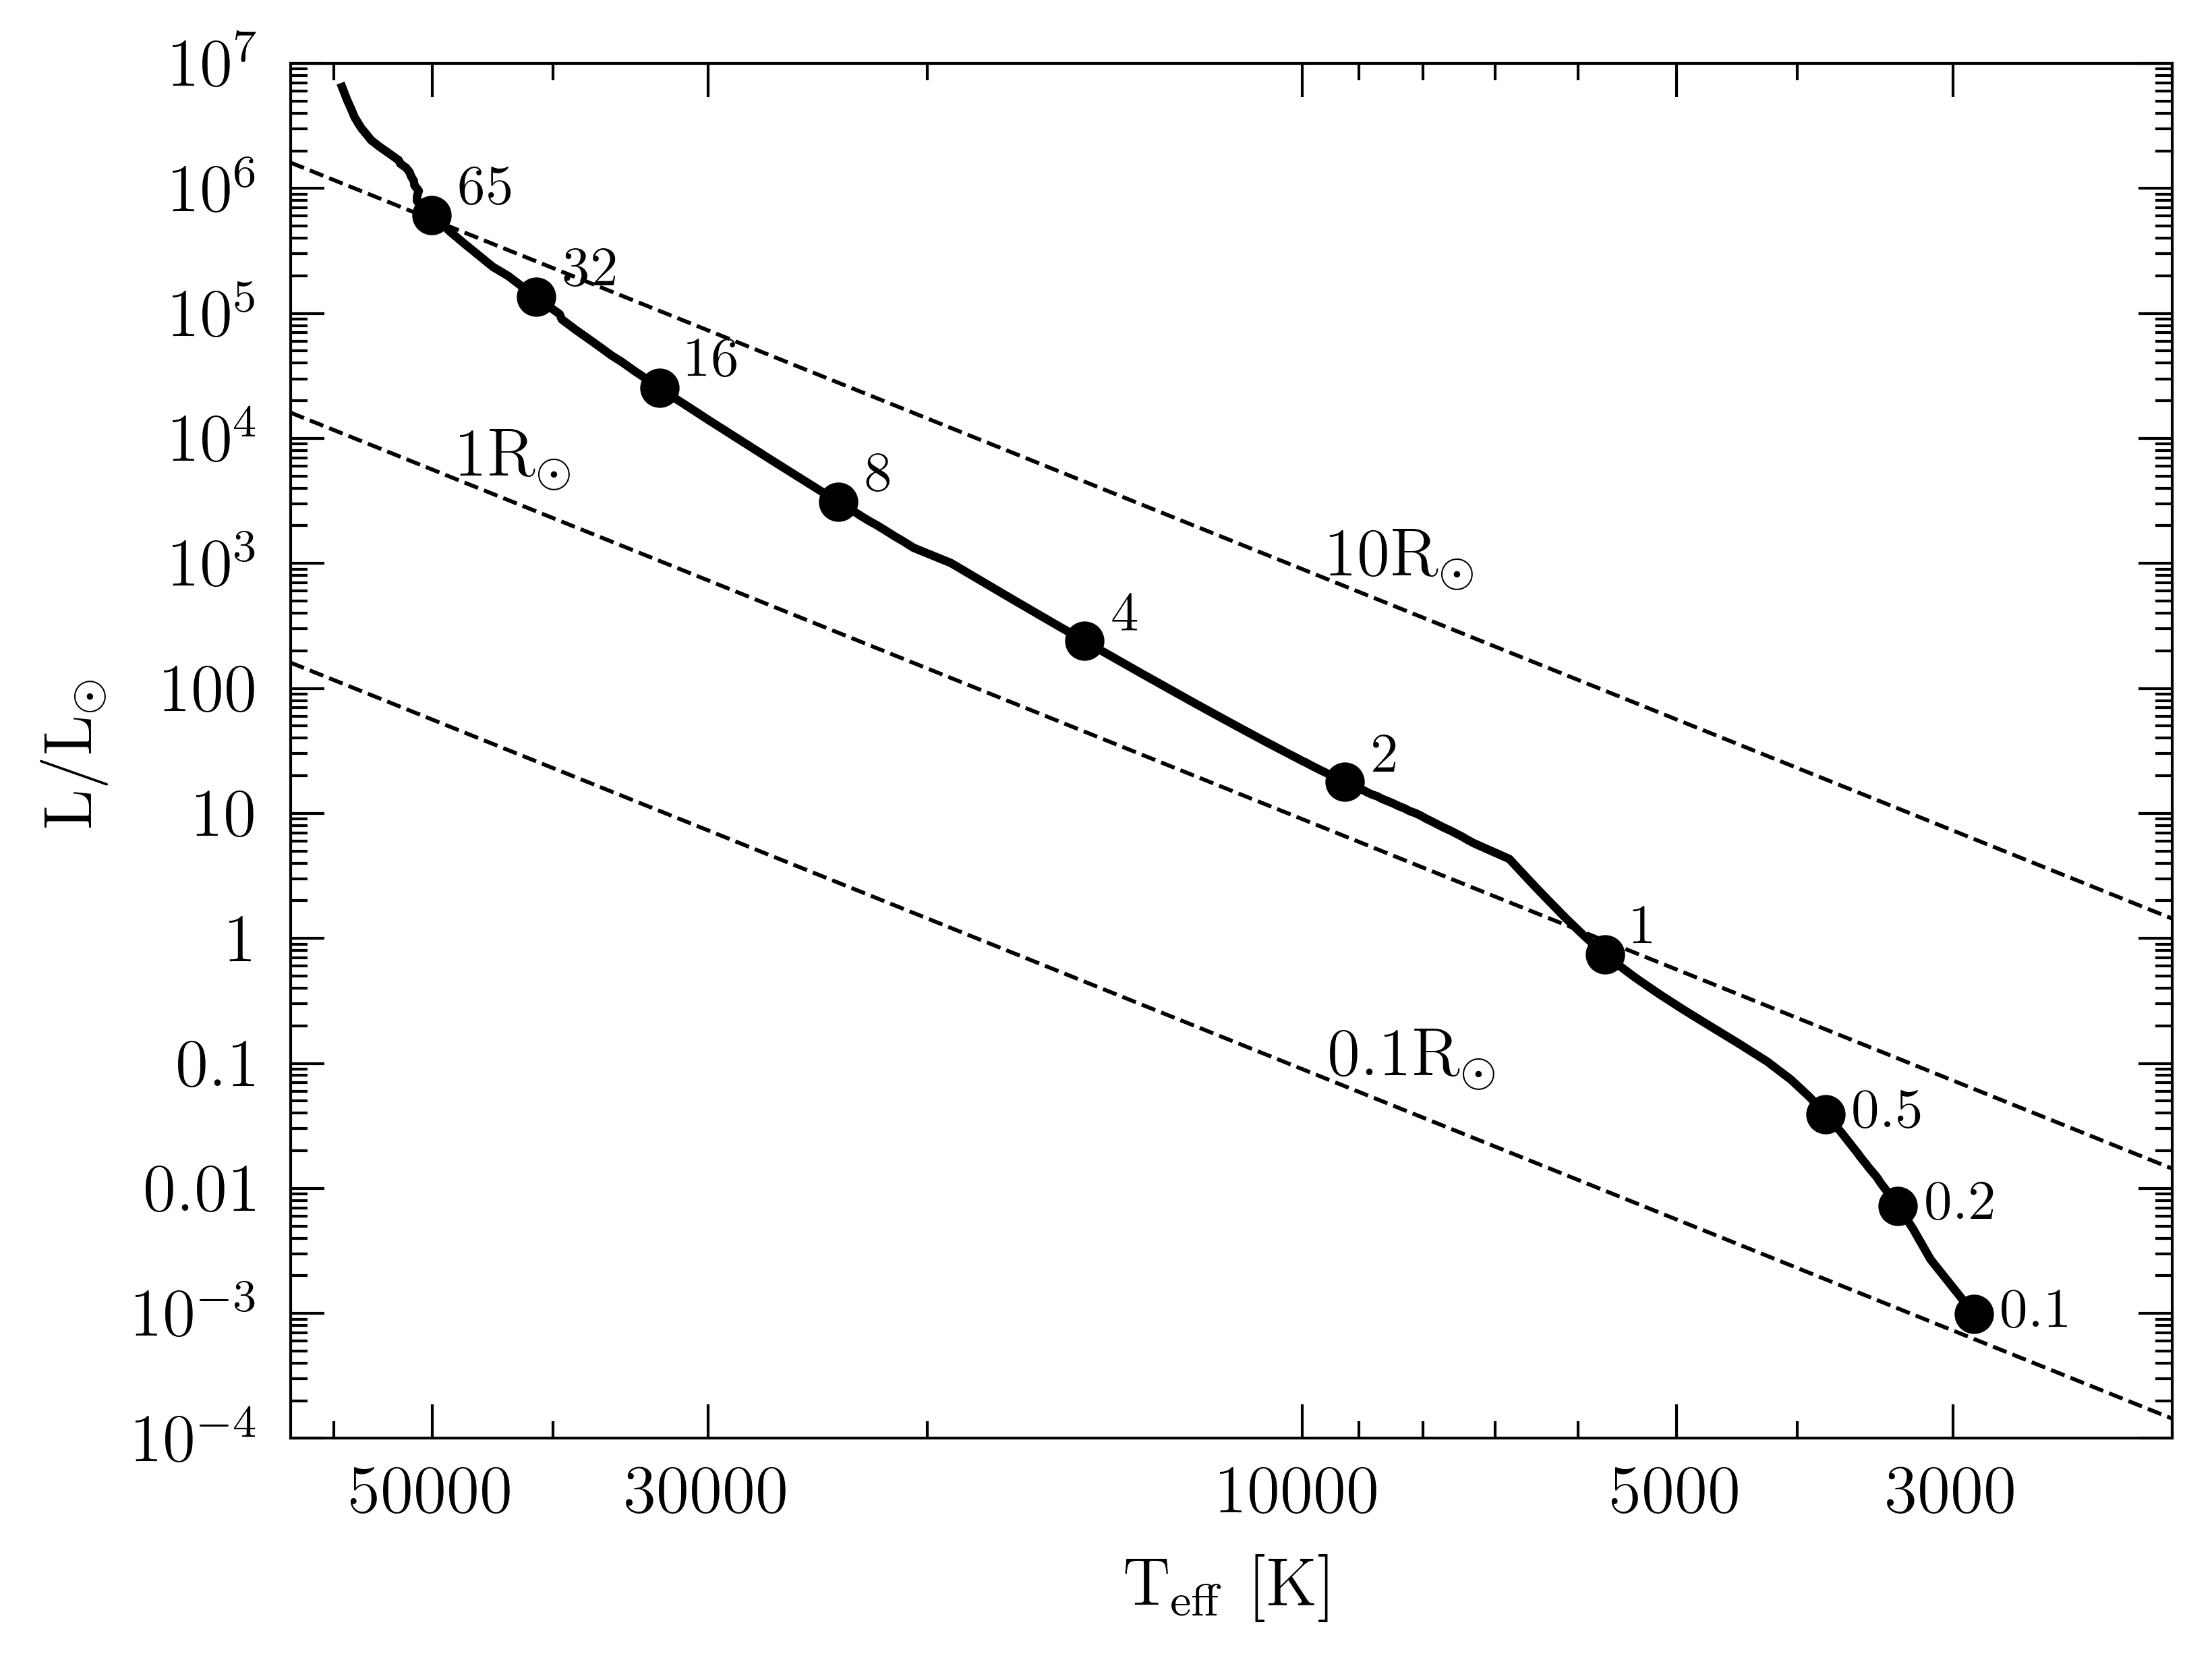

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

# colors to use

zamsColor = 'black'

# do it

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(maxT,minT)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([3000.,5000.,10000.,30000.,50000.])
ax.set_xticklabels(['3000','5000','10000','30000','50000'])
ax.set_xlabel(r'T$_{\rm eff}$ [K]',fontsize=axisFontSize)


ax.set_ylim(minL,maxL)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0e-4,0.001,0.01,0.1,1,10,100,1000,1e4,1e5,1e6,1e7])
ax.set_yticklabels([r'10$^{-4}$',r'10$^{-3}$','0.01','0.1','1','10','100','10$^3$','10$^4$','10$^5$',
                    '10$^6$','10$^7$'])
ax.set_ylabel(r'L/L$_{\odot}$',fontsize=axisFontSize)

ax.plot(zamsT,zamsL,color=zamsColor,lw=1.5)

# Plot dots at a set of representative masses

for mass in massList:
    im = np.where(zamsM==mass)
    ax.plot(zamsT[im],zamsL[im],'o',markersize=6,color='black',zorder=10)
    if mass < 1:
        ax.text(0.95*zamsT[im],zamsL[im],fr'{mass:.1f}',ha='left',va='center',color='black',
                 fontsize=10)
    else:
        ax.text(0.95*zamsT[im],zamsL[im],fr'{int(mass):d}',ha='left',va='bottom',color='black',
                 fontsize=10)
    
# Plots of constant R/R_sun

minT4 = (minT/Tsun)**4
maxT4 = (maxT/Tsun)**4

for i,rstar in enumerate(radii):
    minLR = (rstar*rstar)*minT4
    maxLR = (rstar*rstar)*maxT4   
    ax.plot([maxT,minT],[maxLR,minLR],'--',color='black',lw=0.7)
    
    labT4 = (labelT[i]/Tsun)**4
    labLR = (rstar*rstar)*labT4
    if rstar < 1.0:
        ax.text(0.95*labelT[i],1.2*labLR,fr'{rstar:.1f}R$_\odot$',ha='left',va='center',
                 fontsize=axisFontSize,color='black')
    else:
        ax.text(0.95*labelT[i],1.2*labLR,fr'{int(rstar):d}R$_\odot$',ha='left',va='center',
                 fontsize=axisFontSize,color='black')
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')